<IPython.core.display.Javascript object>


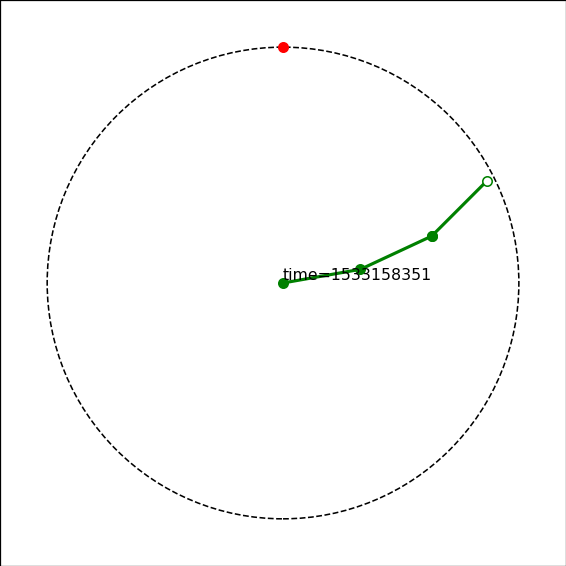

Select plot window and press Shift to toggle mode or press Enter to quit.


'\nt = 0.0\nwhile not exitFlag:\n    if mode == -1:\n        targetX = Arm.xRoot + 1.1 * (math.cos(0.12*t) * reach) * math.cos(t)\n        targetY = Arm.yRoot + 1.1 * (math.cos(0.2*t) * reach) * math.sin(t)\n        targetPt.set_data(targetX, targetY)\n        target = np.array([[targetX, targetY, 0, 1]]).T\n        t += 0.025\n    \n    move_to_target()\n    ax.draw_artist(armLine)\n    ax.draw_artist(endEff)\n    ax.draw_artist(targetPt)\n    #fig.canvas.mpl_disconnect(cid)\n    '

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
from RobotArm import *
import time

%matplotlib notebook

# Instantiate robot arm class.
Arm = RobotArm2D()

# Add desired number of joints/links to robot arm object.
Arm.add_revolute_link(length=3, thetaInit=math.radians(10))
Arm.add_revolute_link(length=3, thetaInit=math.radians(15))
Arm.add_revolute_link(length=3, thetaInit=math.radians(20))
Arm.update_joint_coords()

# Initialize target coordinates to current end effector position.
target = Arm.joints[:,[-1]]

# Initialize plot and line objects for target, end effector, and arm.
fig, ax = plt.subplots(figsize=(5,5))
text=ax.text(0,0, "", va="bottom", ha="left")
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
targetPt, = ax.plot([], [], marker='o', c='r')
endEff, = ax.plot([], [], marker='o', markerfacecolor='w', c='g', lw=2)
armLine, = ax.plot([], [], marker='o', c='g', lw=2)

# Determine maximum reach of arm.
reach = sum(Arm.lengths)

# Set axis limits based on reach from root joint.
ax.set_xlim(Arm.xRoot - 1.2 * reach, Arm.xRoot + 1.2 * reach)
ax.set_ylim(Arm.yRoot - 1.2 * reach, Arm.yRoot + 1.2 * reach)

# Add dashed circle to plot indicating reach.
circle = plt.Circle((Arm.xRoot, Arm.yRoot), reach, ls='dashed', fill=False)
ax.add_artist(circle)
text=ax.text(0,0, "", va="bottom", ha="left")

def update_plot():
    '''Update arm and end effector line objects with current x and y
        coordinates from arm object.
    '''
    armLine.set_data(Arm.joints[0,:-1], Arm.joints[1,:-1])
    endEff.set_data(Arm.joints[0,-2::], Arm.joints[1,-2::])
    target = np.array([[0, 9, 0, 1]]).T
    targetPt.set_data(0,9)
    #tx = 'pos=%d' % (Arm.joints[0,-1])
    #text.set_text(tx)
    
    fig.canvas.draw()
    

update_plot()

def move_to_target():
    '''Run Jacobian inverse routine to move end effector toward target.'''
    global Arm, target, reach

    # Set distance to move end effector toward target per algorithm iteration.
    distPerUpdate = 0.02 * reach

    if np.linalg.norm(target - Arm.joints[:,[-1]]) > 0.02 * reach:
        targetVector = (target - Arm.joints[:,[-1]])[:3]
        targetUnitVector = targetVector / np.linalg.norm(targetVector)
        deltaR = distPerUpdate * targetUnitVector
        J = Arm.get_jacobian()
        JInv = np.linalg.pinv(J)
        deltaTheta = JInv.dot(deltaR)
        Arm.update_theta(deltaTheta)
        Arm.update_joint_coords()
        update_plot()
        

# "mode" can be toggled with the Shift key between 1 (click to set
# target location) and -1 (target moves in predefined motion).
mode = -1

#def on_button_press(event):
#    '''Mouse button press event to set target at the location in the
#        plot where the left mousebutton is clicked.
#    '''
#    global target, targetPt
#    xClick = event.xdata
#    yClick = event.ydata

#    # Ensure that the x and y click coordinates are within the axis limits
#    # by checking that they are floats.
#    if (mode == 1 and event.button == 1 and isinstance(xClick, float)
#        and isinstance(yClick, float)):
#        targetPt.set_data(xClick, yClick)
#        target = np.array([[xClick, yClick, 0, 1]]).T
        
#    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
#    text.set_text(tx)
#cid = fig.canvas.mpl_connect('button_press_event', on_button_press)

# Use "exitFlag" to halt while loop execution and terminate script.
exitFlag = False

#def on_key_press(event):
#    '''Key press event to stop script execution if Enter is pressed,
#        or toggle mode if Shift is pressed.
#    '''
#    global exitFlag, mode
#    if event.key == 'enter':
#        exitFlag = True
#    elif event.key == 'shift':
#        mode *= -1
#fig.canvas.mpl_connect('key_press_event', on_key_press)

# Turn on interactive plotting and show plot.
#plt.ion()
plt.show()
fig.canvas.draw()

print('Select plot window and press Shift to toggle mode or press Enter to quit.')

# Variable "t" is used for moving target mode.

timer = fig.canvas.new_timer(interval=1000)
timer.add_callback(move_to_target)
timer.start()

'''
t = 0.0
while not exitFlag:
    if mode == -1:
        targetX = Arm.xRoot + 1.1 * (math.cos(0.12*t) * reach) * math.cos(t)
        targetY = Arm.yRoot + 1.1 * (math.cos(0.2*t) * reach) * math.sin(t)
        targetPt.set_data(targetX, targetY)
        target = np.array([[targetX, targetY, 0, 1]]).T
        t += 0.025
    
    move_to_target()
    ax.draw_artist(armLine)
    ax.draw_artist(endEff)
    ax.draw_artist(targetPt)
    #fig.canvas.mpl_disconnect(cid)
    '''

<IPython.core.display.Javascript object>


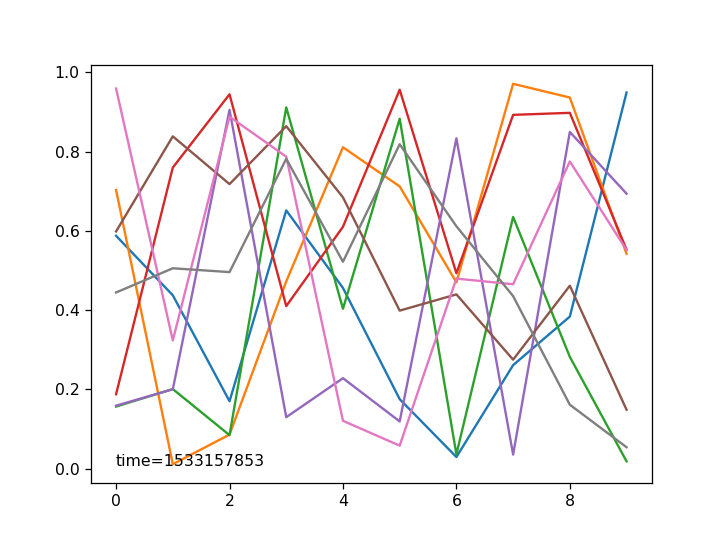

In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))
text=ax.text(0,0, "", va="bottom", ha="left")


def update():
    ax.plot(np.random.rand(10))
    tx = 'time=%d' % (time.time())
    text.set_text(tx)

timer2 = fig.canvas.new_timer(interval=1000)
timer2.add_callback(update)
timer2.start()


#cid = fig.canvas.mpl_connect('button_press_event', update)

In [10]:
timer.stop()

In [13]:
timer2.stop()